In [41]:
import numpy as np
from scipy.linalg import eigvals


In [42]:
def system_of_odes(u, k):
    u1, u2, u3 = u
    return np.array([
        -k[0] * u1 + k[1] * u2 * u3,
        k[0] * u1 - k[1] * u2 * u3 - k[2] * u2**2,
        k[2] * u2**2
    ])

def jacobian(u, k):
    u1, u2, u3 = u
    return np.array([
        [-k[0], k[1] * u3, k[1] * u2],
        [k[0], -k[1] * u3 - 2 * k[2] * u2, -k[1] * u2],
        [0, 2 * k[2] * u2, 0]
    ])

In [30]:
def forward_euler_adaptive(u0, k, h0, t_final):
    u = u0.copy()
    h = h0
    t = 0
    time_steps = [t]
    solutions = [u.copy()]
    hs = [h]

    while t < t_final:
        
        u_new = u + h * system_of_odes(u, k)
        J = jacobian(u, k)
        eigenvalues = eigvals(J)
        
        # Compute the maximum absolute value of the eigenvalues
        # print(np.real(eigenvalues))
        abs_eigv = np.max(np.abs(np.real(eigenvalues)))
        h_eigen = 2 / abs_eigv
        if h_eigen <= h:
            h = h_eigen
        # Update time and solution
        t += h
        u = u_new
        
        # Store the results
        time_steps.append(t)
        solutions.append(u.copy())
        hs.append(h)
    
    return np.array(time_steps), np.array(solutions), np.array(hs)


In [61]:

# Initial conditions for u1, u2, u3
u0 = np.array([1.0, 0.5, 1.0])

# constants k1, k2, k3
k = np.array([1, 0.5, 0.5])

# Initial step size
h0 = 1

# Final time
t_final = 500


time_steps, solutions, hs = forward_euler_adaptive(u0, k, h0, t_final)

# Display the first few time steps and corresponding solutions
time_steps[:5], solutions[:5], hs[:5]


(array([0.        , 1.        , 2.        , 3.        , 3.94152463]),
 array([[ 1.        ,  0.5       ,  1.        ],
        [ 0.25      ,  1.125     ,  1.125     ],
        [ 0.6328125 ,  0.109375  ,  1.7578125 ],
        [ 0.09613037,  0.64007568,  1.76379395],
        [ 0.56448081, -0.03312319,  1.96864239]]),
 array([1.        , 1.        , 1.        , 1.        , 0.94152463]))

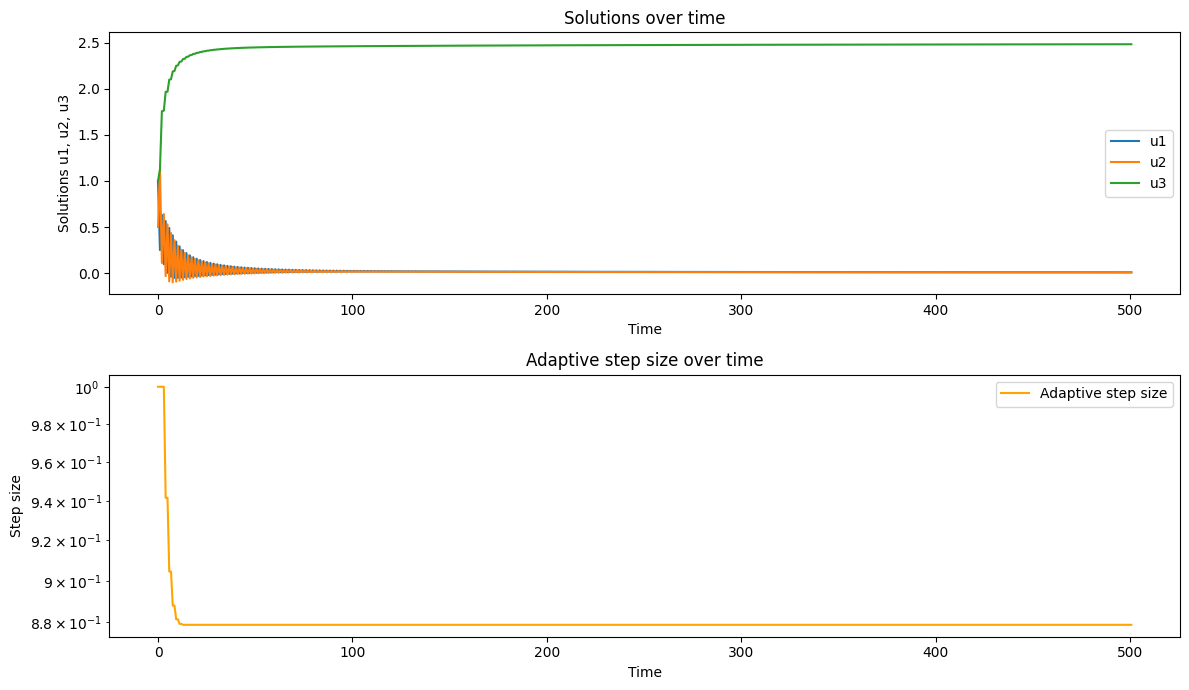

In [62]:
import matplotlib.pyplot as plt

def plot_solutions(time_steps, solutions, hs):
    # Plot each component of u
    plt.figure(figsize=(12, 7))
    
    plt.subplot(2, 1, 1)
    plt.plot(time_steps, solutions[:, 0], label='u1')
    plt.plot(time_steps, solutions[:, 1], label='u2')
    plt.plot(time_steps, solutions[:, 2], label='u3')
    plt.title('Solutions over time')
    plt.xlabel('Time')
    plt.ylabel('Solutions u1, u2, u3')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(time_steps, hs, label='Adaptive step size', color='orange')
    plt.yscale('log')
    plt.title('Adaptive step size over time')
    plt.xlabel('Time')
    plt.ylabel('Step size')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


plot_solutions(time_steps, solutions, hs)


In [63]:
hs[-1]

0.8788343196294188